Binary classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Generating Synthetic data using the make_circles

In [2]:
from sklearn.datasets import make_circles
#making a thousand circles
n_samples=1000
X,y=make_circles(n_samples=1000, noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
#Creating a dataframe for the circles
circles=pd.DataFrame({"X_1":X[:,0],"X_2":X[:,1],"Label":y})

In [6]:
circles

,X_1,X_2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
circles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     1000 non-null   float64
 1   X_2     1000 non-null   float64
 2   Label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
circles.describe()

,X_1,X_2,Label
count,1000.000000,1000.000000,1000.00000
mean,-0.000448,-0.000804,0.50000
std,0.639837,0.641156,0.50025
min,-1.059502,-1.067768,0.00000
25%,-0.619251,-0.612176,0.00000
50%,0.008762,-0.003949,0.50000
75%,0.621933,0.624822,1.00000
max,1.033712,1.036004,1.00000


In [9]:
circles["Label"].value_counts()

1    500
0    500
Name: Label, dtype: int64

the labels is balance having same number of zeros and one.

Visualisation of the dataset

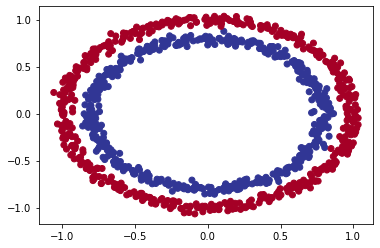

In [10]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
len(X),len(y)

(1000, 1000)

In [13]:
## buiding a model to either red or blue

In [14]:
#Splitting the the Data in training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [15]:
import tensorflow as tf

In [16]:
tf.random.set_seed(42)
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model.fit(X_train,y_train, epochs=5, validation_data=(X_test,y_test))


Epoch 1/5


22/22 [==============================] - 1s 17ms/step - loss: 4.3220 - accuracy: 0.4129 - val_loss: 4.2070 - val_accuracy: 0.4300
Epoch 2/5
22/22 [==============================] - 0s 5ms/step - loss: 4.2618 - accuracy: 0.4129 - val_loss: 4.1290 - val_accuracy: 0.4400
Epoch 3/5
22/22 [==============================] - 0s 4ms/step - loss: 4.2222 - accuracy: 0.4129 - val_loss: 4.0694 - val_accuracy: 0.4400
Epoch 4/5
22/22 [==============================] - 0s 4ms/step - loss: 4.1804 - accuracy: 0.4229 - val_loss: 4.0520 - val_accuracy: 0.4467
Epoch 5/5
22/22 [==============================] - 0s 4ms/step - loss: 4.1560 - accuracy: 0.4300 - val_loss: 4.0454 - val_accuracy: 0.4500


In [17]:
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [18]:
# Plot the decision boundary
def plot_decision_boundary( model,x, y, title="Decision Boundary"):
   # h = 0.02  # step size in the mesh

    x_min, x_max = X_test[:, 0].min() - 0.1, X_test[:, 0].max() + 0.1
    y_min, y_max = X_test[:, 1].min() - 0.1, X_test[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    x_in= np.c_[xx.ravel(), yy.ravel()]
    
    y_pred = model.predict(x_in)
    
    #checking multi-class
    if len(y_pred[0])>1:
        print("multiclass classification")
        #if so we have to reshape our predictions
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred=np.round(y_pred).reshape(xx.shape)
        
    plt.contourf(xx, yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y, cmap=plt.cm.RdYlBu, s=40)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


313/313 [==============================] - 0s 1ms/step
doing binary classification


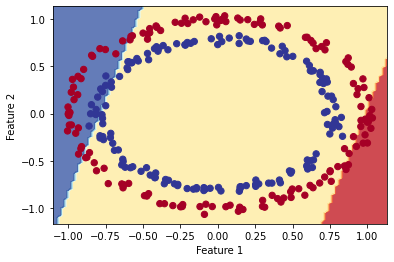

In [19]:
plot_decision_boundary(model=model,x=X_test,y=y_test)

In [20]:
tf.random.set_seed(42)
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_1.fit(X_train,y_train, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
22/22 [==============================] - 1s 12ms/step - loss: 4.4567 - accuracy: 0.4800 - val_loss: 4.6332 - val_accuracy: 0.4667
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 4.3923 - accuracy: 0.4814 - val_loss: 4.6154 - val_accuracy: 0.4667
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 4.3771 - accuracy: 0.4800 - val_loss: 4.5677 - val_accuracy: 0.4667
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 4.3664 - accuracy: 0.4771 - val_loss: 4.5537 - val_accuracy: 0.4667
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 4.3578 - accuracy: 0.4729 - val_loss: 4.5419 - val_accuracy: 0.4700
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 4.3496 - accuracy: 0.4743 - val_loss: 4.5323 - val_accuracy: 0.4700
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 4.3424 - accuracy: 0.4757 - val_loss: 4.5242 - val_accuracy: 0.4700
Epoch 8/50
22/22 [=

313/313 [==============================] - 1s 1ms/step
doing binary classification


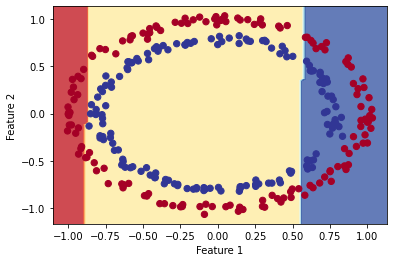

In [21]:
plot_decision_boundary(model=model_1,x=X_test,y=y_test)

Improving the model by addition of the activation since accuracy is still 50% and loss is still high.

In [22]:
tf.random.set_seed(42)
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),
    tf.keras.layers.Dense(1, activation= "relu")
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_2.fit(X_train,y_train, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
22/22 [==============================] - 1s 11ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/50
22/22 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 8/50
22/22 [=

313/313 [==============================] - 0s 1ms/step
doing binary classification


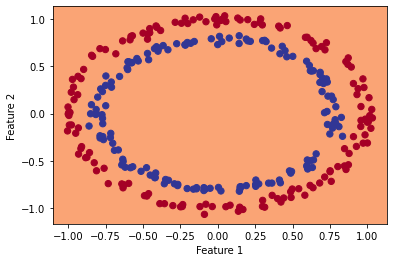

In [23]:
plot_decision_boundary(model=model_2,x=X_test,y=y_test)

Increasing the numbers of layers and epoch

In [24]:
tf.random.set_seed(42)
model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history=model_3.fit(X_train,y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 0.6905 - accuracy: 0.4957 - val_loss: 0.6876 - val_accuracy: 0.5000
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5000 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.5000 - val_loss: 0.6842 - val_accuracy: 0.5000
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5000 - val_loss: 0.6814 - val_accuracy: 0.5000
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5000 - val_loss: 0.6788 - val_accuracy: 0.5000
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.5000 - val_loss: 0.6744 - val_accuracy: 0.5000
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.5043 - val_loss: 0.6696 - val_accuracy: 0.5000
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 60/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 61/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 62/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 63/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 64/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9967
Epoch 65/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 

313/313 [==============================] - 1s 2ms/step
doing binary classification


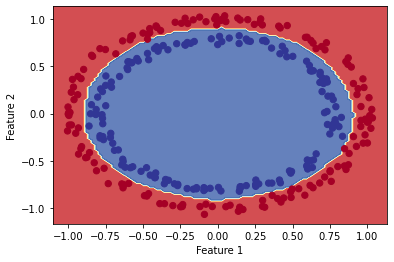

In [25]:
plot_decision_boundary(model=model_3,x=X_test,y=y_test)

By adding more layers to the model, model_3 achieved an accuracy of 1  (100%)

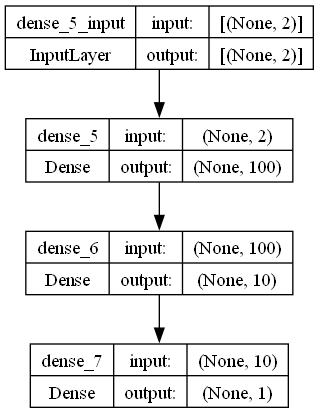

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes=True)

In [27]:
history.history

{'loss': [0.690500795841217,
  0.6873939633369446,
  0.6845138072967529,
  0.6819941997528076,
  0.6788941621780396,
  0.675757884979248,
  0.6718643307685852,
  0.6663877964019775,
  0.6598232984542847,
  0.6494573354721069,
  0.6404058337211609,
  0.625822126865387,
  0.610061526298523,
  0.592194139957428,
  0.5718712210655212,
  0.5490478277206421,
  0.5236413478851318,
  0.49628204107284546,
  0.4742831289768219,
  0.43693476915359497,
  0.40719151496887207,
  0.373320996761322,
  0.3497907221317291,
  0.31905892491340637,
  0.2901546061038971,
  0.26605501770973206,
  0.24038994312286377,
  0.2212381213903427,
  0.20178833603858948,
  0.18571576476097107,
  0.1721242368221283,
  0.15314359962940216,
  0.14016444981098175,
  0.12885481119155884,
  0.11853448301553726,
  0.11091700941324234,
  0.10307411104440689,
  0.09583230316638947,
  0.08881726115942001,
  0.08241622895002365,
  0.07832563668489456,
  0.07333243638277054,
  0.06746222078800201,
  0.06346657872200012,
  0.06044

putting the history data into a dataframe

In [28]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.690501,0.495714,0.687597,0.500000
1,0.687394,0.500000,0.686443,0.500000
2,0.684514,0.500000,0.684191,0.500000
3,0.681994,0.500000,0.681414,0.500000
4,0.678894,0.500000,0.678843,0.500000
...,...,...,...,...
95,0.009913,1.000000,0.012828,1.000000
96,0.009924,1.000000,0.011375,1.000000
97,0.009331,1.000000,0.010249,1.000000
98,0.008853,1.000000,0.013335,0.996667


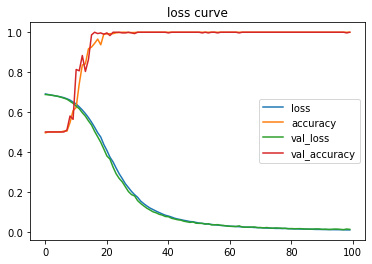

In [29]:
pd.DataFrame(history.history).plot()
plt.title("loss curve")
plt.legend()

In [30]:
###accurracy
from sklearn.metrics import confusion_matrix

In [31]:
y_predictions=model_3.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [32]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], d

In [33]:
y_predictions

array([[9.96635437e-01],
       [9.30978298e-01],
       [9.98774230e-01],
       [9.83922422e-01],
       [1.69970170e-02],
       [9.99000132e-01],
       [9.98425424e-01],
       [9.97632921e-01],
       [9.95688617e-01],
       [4.04392323e-03],
       [9.98198569e-01],
       [1.32482930e-03],
       [6.30904906e-05],
       [9.97806489e-01],
       [9.98219967e-01],
       [9.97143209e-01],
       [1.13445130e-04],
       [1.10256724e-01],
       [4.11936687e-03],
       [9.98520255e-01],
       [5.53754577e-03],
       [9.98610079e-01],
       [2.10482581e-03],
       [8.21685605e-03],
       [3.15475911e-01],
       [1.52668013e-04],
       [9.98520076e-01],
       [9.98110652e-01],
       [4.07698974e-02],
       [9.98961091e-01],
       [9.95189786e-01],
       [1.62039394e-03],
       [9.97537196e-01],
       [9.99016047e-01],
       [3.19466135e-03],
       [9.98125434e-01],
       [4.99737337e-02],
       [1.43442792e-03],
       [9.70604233e-05],
       [9.98722076e-01],


In [34]:
#prediction values have come out as continous while y is binary
#hence we convert our prediction binary

y_predictions= tf.round(y_predictions)
y_predictions

<tf.Tensor: shape=(300, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
 

In [35]:
confusion_matrix(y_predictions,y_test)

array([[150,   0],
       [  0, 150]], dtype=int64)

Given the balanced distribution of the class labels (class 0-500 and class 1-500), the model's performance with perfect accuracy of 100% also seen the the confussion (TN: 150, FP: 0, FN: 0,TP: 150), the model did not overfit. 